### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미로 크롤링
- 특정 영역(Elemnet)을 자르기
     - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
     - conda install -c anaconda pillow
     - pip install pillow
- 유투브 영상 : 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM영역에만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용
    

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import time
import requests
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [8]:
!mkdir datas

In [7]:
url = "https://www.youtube.com/watch?v=vsZRKm-9Ggs&t=60s"
driver = webdriver.Chrome()
driver.get(url)

In [9]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [10]:
!ls datas

screenshot.png


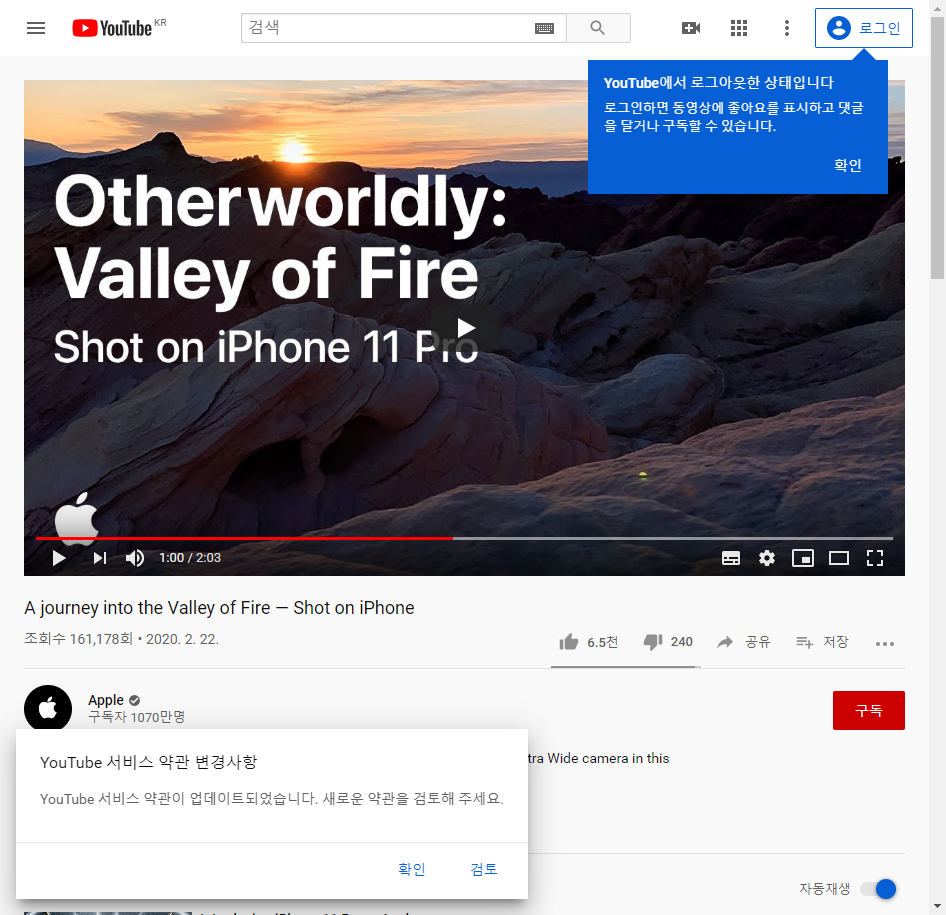

In [13]:
pil_img = pil.open("datas/screenshot.png")
pil_img


#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [14]:
driver = webdriver.Chrome()
driver.get(url)

In [16]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 240, 'width': 427}


In [21]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰 줘야 합니다.
left = location["x"]*2
top = location["y"]*2
right = left + size["width"]*2
bottom = top+size["height"]*2
area = (left, top, right, bottom)
area

(48, 160, 902, 640)

#### 3. 이미지를 pillow로 잘라주기

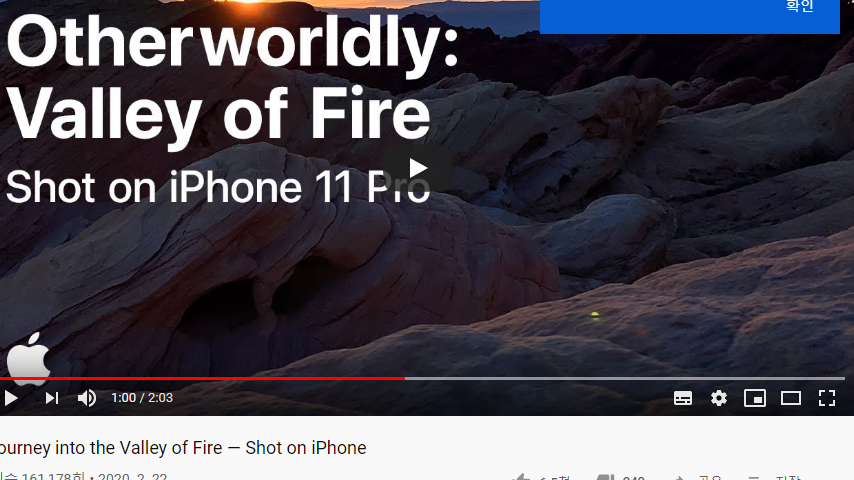

In [22]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [23]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [25]:
!ls datas


screenshot.png
screenshot_element.png


#### 썸네일 만들기 
- 원본 이미지를 다양한 사이즈로 축소하는 방법


In [26]:
pil_element_img.size


(854, 480)

(286, 160)


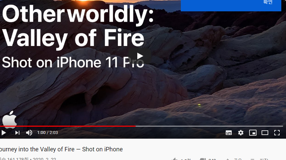

In [29]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

### fake useragent

In [30]:
from fake_useragent import UserAgent

In [31]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()

In [35]:
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36


In [40]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36


#### Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 크롬 버젼 60 버전 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [41]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("http://fastcampus.co.kr/")
print(driver.title)
driver.quit()

패스트캠퍼스 - 커리어 성장을 위한 최고의 실무교육 아카데미


#### 영상 파일 다운로드
- www. -> ss 로 변경하면 다운로드 받을수 있는 사이트에 접속

In [51]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [52]:
url = "https://www.youtube.com/watch?v=vsZRKm-9Ggs"

In [53]:
link = "https://r3---sn-ab5l6nzr.googlevideo.com/videoplayback?expire=1582790155&ei=qyFXXo62F4WVhgaVxoq4Cg&ip=143.137.168.126&id=o-AEjUVrNBdgrNBOuWtzrXlKvSmyvleo1WkPr4aX9RPW6h&itag=22&source=youtube&requiressl=yes&mm=31%2C26&mn=sn-ab5l6nzr%2Csn-p5qs7n7d&ms=au%2Conr&mv=m&mvi=2&pl=22&initcwndbps=3978750&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=123.390&lmt=1582397863568028&mt=1582768476&fvip=3&fexp=23842630&c=WEB&txp=5532432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRQIgJhUKzBwP-M0ucKOjS5pLXQd2djEvjCw0JpFkYZyvg-ICIQCiL_iXtBcyCy6FByo8Xb-Fl5NadPwo0hQ9Rg3-BWnHnA%3D%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AHylml4wRQIgN04v0uucOYsikufm1YK9f9KLmzGzuwFEYdjjBhxaBMgCIQDJ34NiZxV9XXlyX4CAqaXp47YCBar-ZSWwEb_3P6nKoQ%3D%3D&contentlength=29460617&video_id=vsZRKm-9Ggs&title=A+journey+into+the+Valley+of+Fire+%E2%80%94+Shot+on+iPhone"

In [55]:
title = "A journey into the Valley of Fire — Shot on iPhone.mp4"
size = download(title, link)
print("{}Mb".format(round(size/1024/1024),2))

28Mb
